In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
from scipy import stats
from collections import Counter
from matplotlib import patheffects
import matplotlib.patches as patches

#from sklearn.metrics import r2_score

In [15]:
df = pd.read_excel(r"C:\Users\gpavez\Desktop\API - BUK.xlsx", sheet_name="Unificación Niveles")
df.head(1)

,ID_Persona,RUT,Nombre,Género,Cargo,ID_Area,Nombre_Area,Primer_Nivel,Segundo_Nivel,Nivel_Jerarquico_Area,...,Salario_Mediana_Area,Masa_Salarial_Area,Desviacion_Estandar_Area,Posicion_Salarial_Area,Indice_Equidad,Nivel_Equidad_Area,Sueldo Actualizado,Nivel Actualizado,Aumento Pesos,Porcentaje Aumento
0,4771,7811480-0,Miguel Andres Berndt Briceño,M,Gerente General,511,Rol Privado,CARLOS CRAMER PRODUCTOS AROMÁTICOS S.A. C.I.,Administración,Gerencia,...,9800000,121700000,2753331,Muy Alto,0.271,Moderada,18200000,14,0,0.0


In [16]:
df.columns

Index(['ID_Persona', 'RUT', 'Nombre', 'Género', 'Cargo', 'ID_Area',
       'Nombre_Area', 'Primer_Nivel', 'Segundo_Nivel', 'Nivel_Jerarquico_Area',
       'Tipo_Area', 'Centro_Costo_Area', 'Edad', 'Rango de Edad',
       'Años de Servicio', 'Rango de Antigüedad', 'Antigüedad en Cargo',
       'Sueldo Base', 'Es Jefe', 'Jefe Directo', 'Categoria_Empleado',
       'Empleados_Total_Area', 'Salario_Promedio_Area', 'Salario_Mediana_Area',
       'Masa_Salarial_Area', 'Desviacion_Estandar_Area',
       'Posicion_Salarial_Area', 'Indice_Equidad', 'Nivel_Equidad_Area',
       'Sueldo Actualizado', 'Nivel Actualizado', 'Aumento Pesos',
       'Porcentaje Aumento'],
      dtype='object')

In [17]:
df_limpio = df.drop(['ID_Persona', 'RUT', 'Género', 'ID_Area',
       'Nombre_Area', 'Primer_Nivel', 'Segundo_Nivel', 'Nivel_Jerarquico_Area',
       'Tipo_Area', 'Centro_Costo_Area', 'Edad', 'Rango de Edad', 'Rango de Antigüedad', 'Antigüedad en Cargo',
       'Sueldo Base', 'Es Jefe', 'Jefe Directo', 'Categoria_Empleado',
       'Empleados_Total_Area', 'Salario_Promedio_Area', 'Salario_Mediana_Area',
       'Masa_Salarial_Area', 'Desviacion_Estandar_Area',
       'Posicion_Salarial_Area', 'Indice_Equidad', 'Nivel_Equidad_Area','Aumento Pesos',
       'Porcentaje Aumento'], axis=1)

df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nombre              554 non-null    object 
 1   Cargo               554 non-null    object 
 2   Años de Servicio    554 non-null    float64
 3   Sueldo Actualizado  554 non-null    int64  
 4   Nivel Actualizado   554 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 21.8+ KB



Función ajustada: y = 304299 * exp(0.2441 * x)
Función teórica: y = 382426 * exp(0.2228 * x)

ANÁLISIS DE DISPERSIÓN SALARIAL POR NIVEL - DATOS ACTUALIZADOS

📈 FUNCIÓN EXPONENCIAL TEÓRICA:
   • Fórmula: y = 382,426 × e^(0.2228 × x)
   • Constante Base: $382,426
   • Constante Exponencial: 0.2228
   • Número de Euler (e): 2.718281828

📊 FUNCIÓN AJUSTADA A DATOS REALES:
   • Fórmula ajustada: y = 304299 × e^(0.2441 × x)
   • Diferencia en constante base: -20.4%
   • Diferencia en exponente: +9.6%

📊 ESTADÍSTICAS GENERALES:
   • Total colaboradores: 554
   • Niveles con datos: 13 de 15
   • Rango salarial general: $540,000 - $18,200,000

ANÁLISIS DE DISPERSIÓN DETALLADO POR NIVEL
Nivel  N°    Promedio     Teórico      Diff%    Mediana      Desv.Est     CV%      Estado
----------------------------------------------------------------------------------------------------
0      0     Sin datos    $382,426              N/A          N/A          N/A      Sin datos
1      48    $579,958     $47

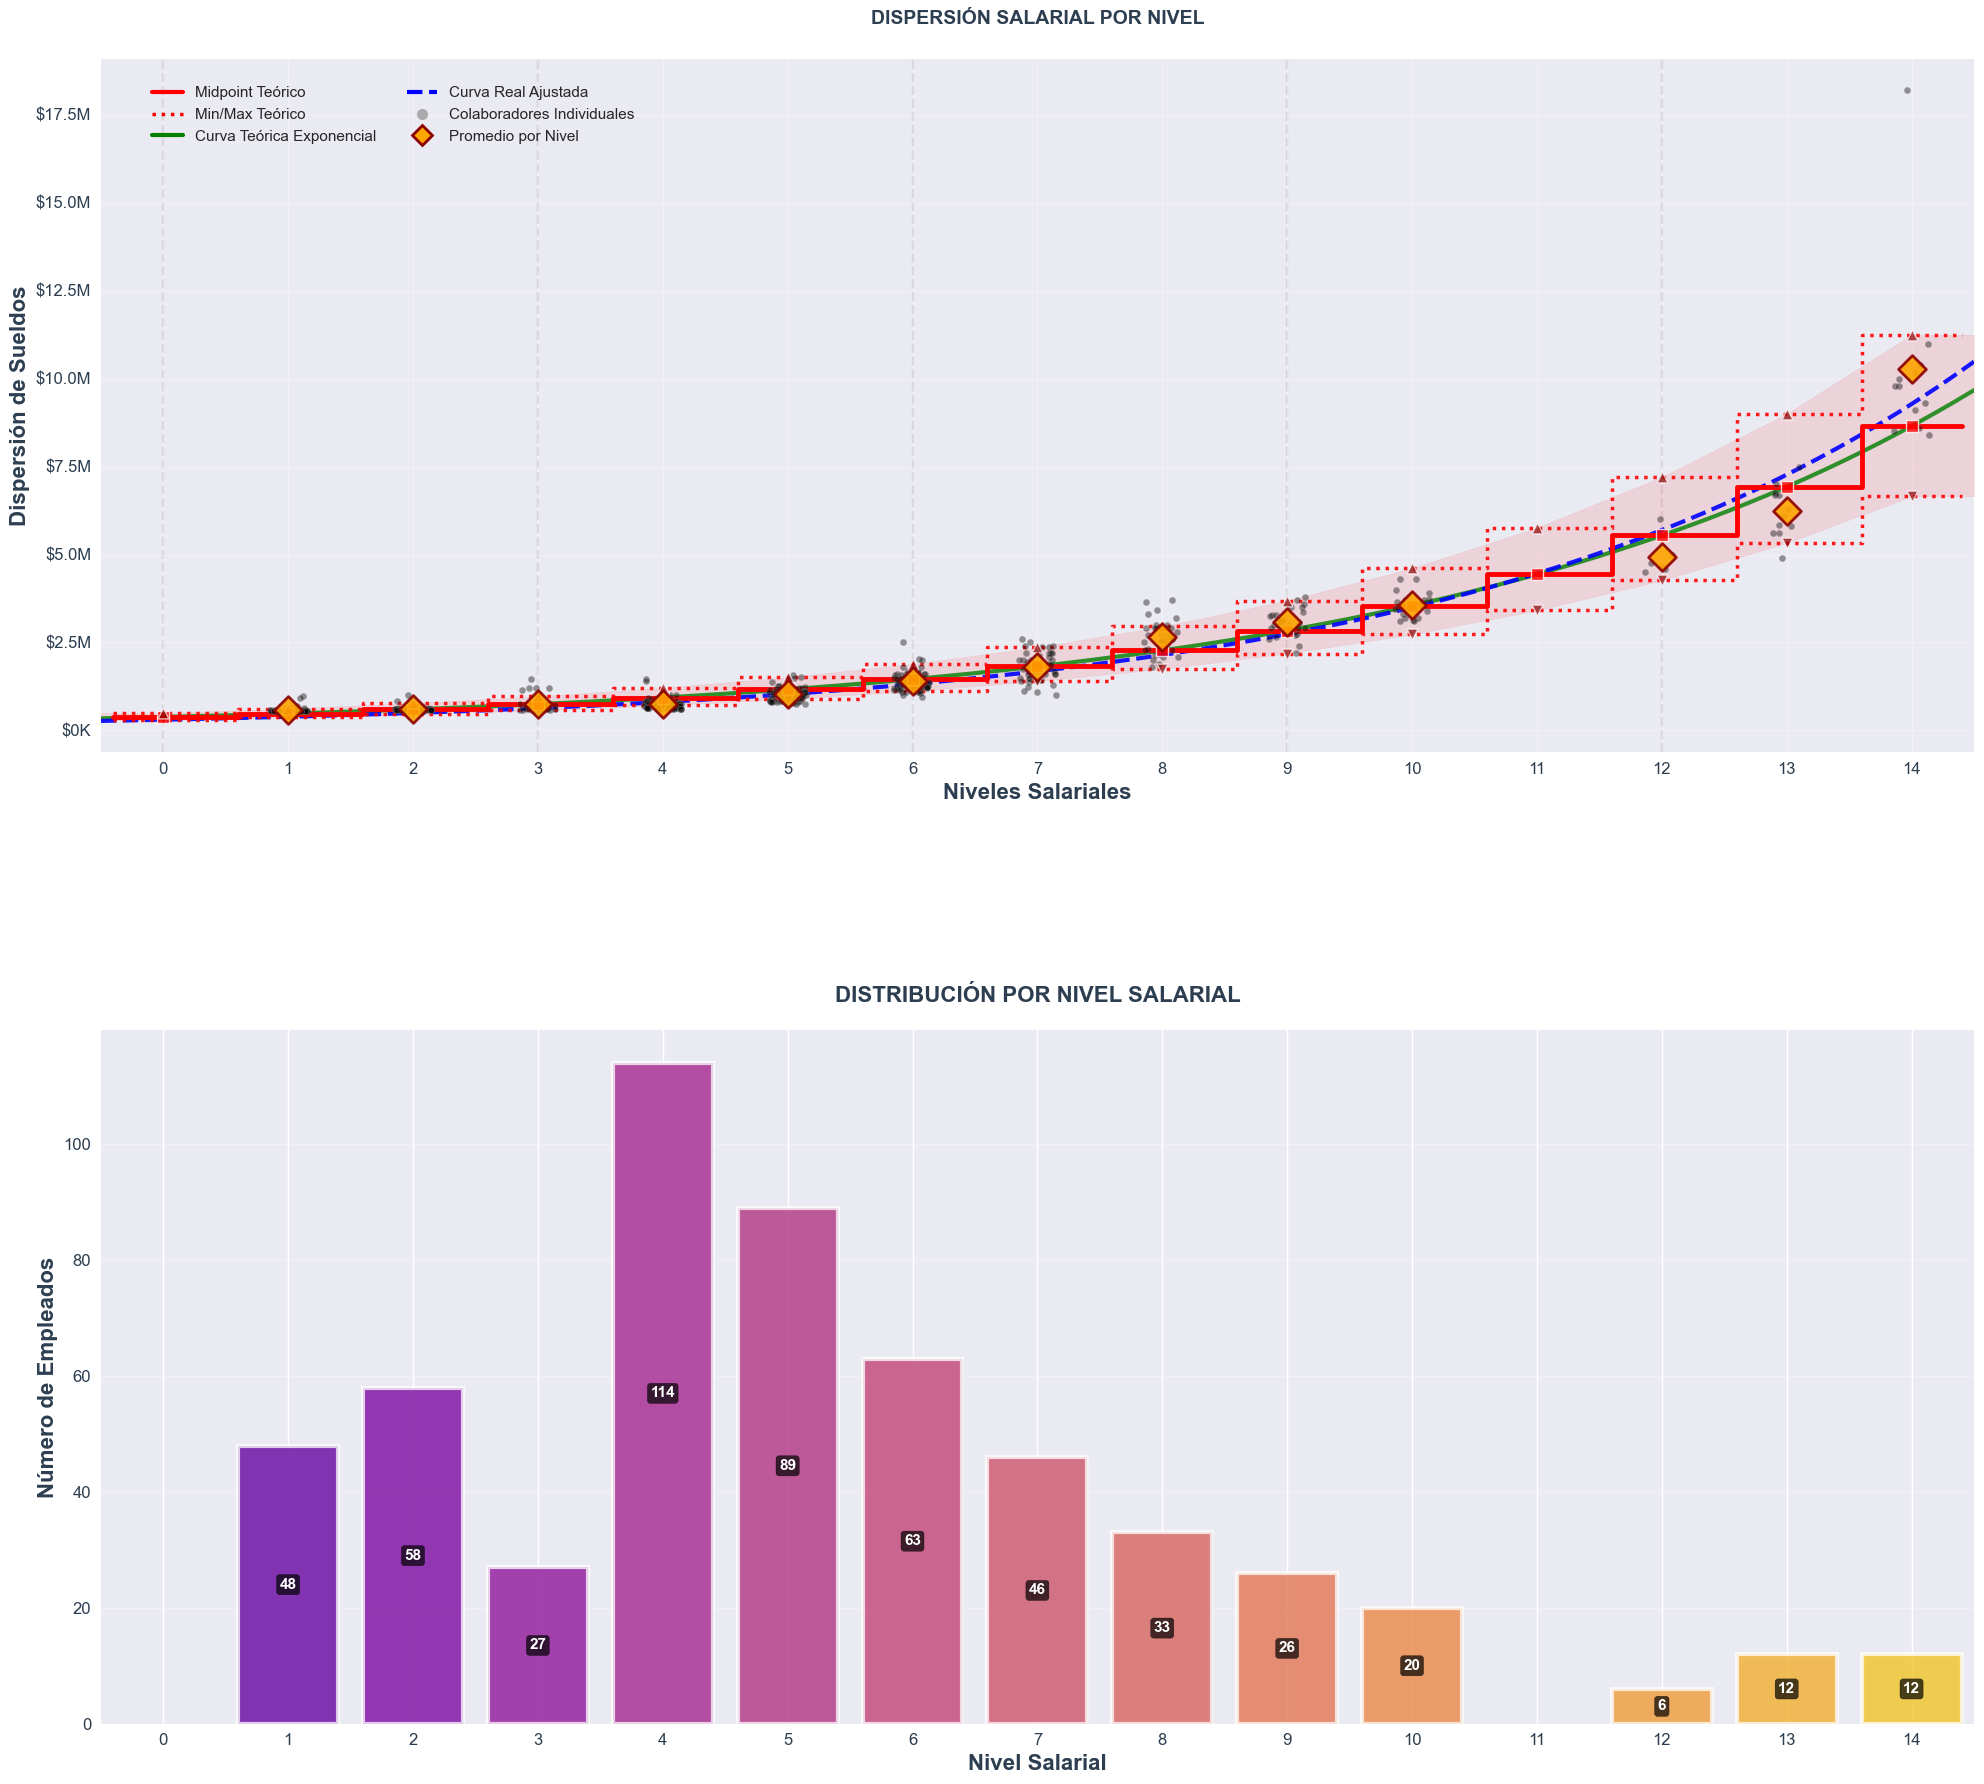

In [18]:
# Configurar estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Importar path_effects para efectos visuales
import matplotlib.patheffects as path_effects

# Datos teóricos actualizados de la empresa (tabla de referencia)
niveles_teoricos = {
    'CAT': list(range(0, 15)),
    'Minimo': [294174, 367591, 459331, 573966, 717212, 896207, 1119873, 1399361, 
               1748600, 2185000, 2730311, 3411717, 4263181, 5327146, 6656645],
    'Midpoint': [382426, 477868, 597130, 746156, 932375, 1165069, 1455835, 1819169,
                 2273180, 2840499, 3549405, 4435232, 5542135, 6925290, 8653639],
    'Maximo': [497154, 621229, 776269, 970003, 1212088, 1514589, 1892586, 2364920,
               2955134, 3692649, 4614226, 5765801, 7204776, 9002877, 11249730]
}

df_teorico = pd.DataFrame(niveles_teoricos)

# Función exponencial teórica ACTUALIZADA
def funcion_exponencial_teorica(x):
    constante_base = 382426
    constante_exponencial = 0.2228
    return constante_base * np.exp(constante_exponencial * x)

# Función exponencial para ajuste
def funcion_exponencial(x, a, b):
    return a * np.exp(b * x)

# Usar el DataFrame existente df_limpio
df = df_limpio.copy()

# Análisis de datos reales
stats_reales = df.groupby('Nivel Actualizado')['Sueldo Actualizado'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).reset_index()

# Contar empleados por nivel
conteo_niveles = Counter(df['Nivel Actualizado'])
niveles_reales = sorted(list(conteo_niveles.keys()))

# Ajustar función exponencial a datos reales
try:
    x_real = np.array(niveles_reales)
    y_real = np.array([stats_reales[stats_reales['Nivel Actualizado'] == nivel]['mean'].iloc[0] 
                      for nivel in x_real])
    
    popt, pcov = curve_fit(funcion_exponencial, x_real, y_real, 
                          p0=[382426, 0.2228], maxfev=3000)
    a_real, b_real = popt
    
    print(f"\nFunción ajustada: y = {a_real:.0f} * exp({b_real:.4f} * x)")
    print(f"Función teórica: y = 382426 * exp(0.2228 * x)")
    
except Exception as e:
    print(f"Error en ajuste: {e}")
    a_real, b_real = 382426, 0.2228

# =============================================================================
# GRÁFICO PRINCIPAL MEJORADO CON DISPERSIÓN DE COLABORADORES
# =============================================================================

# Crear figura con dimensiones optimizadas para dispersión
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 18))

# Preparar datos para el gráfico principal
x_teorico = np.array(range(15))
y_teorico = [funcion_exponencial_teorica(x) for x in x_teorico]
y_real_ajustada = [funcion_exponencial(x, a_real, b_real) for x in x_teorico]

# CREAR ESCALONES PARA MÍNIMO, MIDPOINT Y MÁXIMO
def crear_escalones(x_vals, y_vals):
    """Crea valores x,y para graficar escalones"""
    x_escalon = []
    y_escalon = []
    
    for i, (x, y) in enumerate(zip(x_vals, y_vals)):
        if i == 0:
            # Primer punto
            x_escalon.extend([x - 0.4, x + 0.4])
            y_escalon.extend([y, y])
        else:
            # Línea vertical de conexión
            x_escalon.extend([x - 0.4, x - 0.4])
            y_escalon.extend([y_vals[i-1], y])
            # Línea horizontal del nivel
            x_escalon.extend([x - 0.4, x + 0.4])
            y_escalon.extend([y, y])
    
    return x_escalon, y_escalon

# Crear escalones para cada serie teórica
x_escalon_min, y_escalon_min = crear_escalones(x_teorico, df_teorico['Minimo'])
x_escalon_mid, y_escalon_mid = crear_escalones(x_teorico, df_teorico['Midpoint'])
x_escalon_max, y_escalon_max = crear_escalones(x_teorico, df_teorico['Maximo'])

# Graficar escalones teóricos
ax1.plot(x_escalon_min, y_escalon_min, 'r:', linewidth=2.5, alpha=0.9, 
         label='Mínimo Nivel', zorder=4)
ax1.plot(x_escalon_mid, y_escalon_mid, 'r-', linewidth=3.5, alpha=1.0, 
         label='Midpoint Nivel', zorder=5)
ax1.plot(x_escalon_max, y_escalon_max, 'r:', linewidth=2.5, alpha=0.9, 
         label='Máximo Nivel', zorder=4)

# Curva teórica exponencial (suave)
x_smooth = np.linspace(-0.5, 14.5, 300)
y_smooth_teorica = [funcion_exponencial_teorica(x) for x in x_smooth]
ax1.plot(x_smooth, y_smooth_teorica, 'g-', linewidth=3, label='Curva Teórica (y=382426*e^(0.2228*x))', alpha=0.8, zorder=3)

# Curva real ajustada (suave)
y_smooth_real = [funcion_exponencial(x, a_real, b_real) for x in x_smooth]
ax1.plot(x_smooth, y_smooth_real, 'b--', linewidth=3, label='Curva Real Ajustada', alpha=0.9, zorder=3)

# Área de banda teórica con degradado
ax1.fill_between(x_smooth, 
                 [np.interp(x, x_teorico, df_teorico['Minimo']) for x in x_smooth],
                 [np.interp(x, x_teorico, df_teorico['Maximo']) for x in x_smooth], 
                 alpha=0.1, color='red', label='Banda nivel', zorder=1)

# =============================================================================
# DISPERSIÓN DE TODOS LOS COLABORADORES
# =============================================================================
# Añadir jitter horizontal para evitar superposición de puntos
np.random.seed(42)  # Para reproducibilidad
jitter_amount = 0.15

# Crear arrays para la dispersión
x_scatter = []
y_scatter = []

for nivel in df['Nivel Actualizado'].unique():
    sueldos_nivel = df[df['Nivel Actualizado'] == nivel]['Sueldo Actualizado'].values
    n_empleados = len(sueldos_nivel)
    
    # Generar jitter horizontal para cada empleado
    jitter = np.random.uniform(-jitter_amount, jitter_amount, n_empleados)
    x_positions = np.full(n_empleados, nivel) + jitter
    
    x_scatter.extend(x_positions)
    y_scatter.extend(sueldos_nivel)

# Scatter plot principal con todos los colaboradores
scatter = ax1.scatter(x_scatter, y_scatter, 
                     color="black",
                     alpha=0.4, s=20, 
                     edgecolors='grey', linewidth=0.5,
                     label='Dispersión Colaboradores', zorder=6)

# Marcadores de promedios por nivel (más grandes y visibles)
for nivel in niveles_reales:
    if nivel in stats_reales['Nivel Actualizado'].values:
        promedio = stats_reales[stats_reales['Nivel Actualizado'] == nivel]['mean'].iloc[0]
        ax1.scatter(nivel, promedio, s=200, c='orange', marker='D', 
                   alpha=0.9, edgecolors='darkred', linewidth=2,
                   zorder=8)

# Marcadores específicos en cada nivel teórico (más pequeños para no saturar)
for i in range(15):
    # Marcadores discretos para min, mid, max
    ax1.scatter(i, df_teorico.iloc[i]['Minimo'], s=60, c='darkred', marker='v', 
               alpha=0.7, zorder=6, edgecolors='white', linewidth=1)
    ax1.scatter(i, df_teorico.iloc[i]['Midpoint'], s=80, c='red', marker='s', 
               alpha=0.8, zorder=6, edgecolors='white', linewidth=1)
    ax1.scatter(i, df_teorico.iloc[i]['Maximo'], s=60, c='darkred', marker='^', 
               alpha=0.7, zorder=6, edgecolors='white', linewidth=1)

# Configuración del gráfico principal con mejoras estéticas
ax1.set_xlabel('Niveles Salariales', fontsize=16, fontweight='bold', color='#2c3e50')
ax1.set_ylabel('Dispersión de Sueldos', fontsize=16, fontweight='bold', color='#2c3e50')
ax1.set_title('DISPERSIÓN SALARIAL POR NIVEL', 
             fontsize=14, fontweight='bold', pad=25, color='#2c3e50')

# Grid personalizado
ax1.grid(True, alpha=0.3, zorder=0, linestyle='-', linewidth=0.8)
ax1.set_axisbelow(True)

# Leyenda mejorada - crear elementos personalizados para mejor claridad
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='red', linewidth=3, label='Midpoint Teórico'),
    Line2D([0], [0], color='red', linestyle=':', linewidth=2.5, label='Min/Max Teórico'),
    Line2D([0], [0], color='green', linewidth=3, label='Curva Teórica Exponencial'),
    Line2D([0], [0], color='blue', linestyle='--', linewidth=3, label='Curva Real Ajustada'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=8, 
           alpha=0.6, label='Colaboradores Individuales', linestyle='None'),
    Line2D([0], [0], marker='D', color='w', markerfacecolor='orange', markersize=10,
           markeredgecolor='darkred', markeredgewidth=2, label='Promedio por Nivel', linestyle='None')
]

legend = ax1.legend(handles=legend_elements, loc='upper left', fontsize=11, framealpha=0.95, 
                   fancybox=True, shadow=True, ncol=2,
                   bbox_to_anchor=(0.02, 0.98))
legend.get_frame().set_facecolor('#f8f9fa')
legend.get_frame().set_edgecolor('#dee2e6')

# Formato del eje Y con mejor legibilidad
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M' if x >= 1e6 else f'${x/1e3:.0f}K'))
ax1.set_xlim(-0.5, 14.5)
ax1.set_xticks(range(15))
ax1.tick_params(axis='both', which='major', labelsize=12, colors='#2c3e50')

# Añadir líneas de referencia sutiles
for i in range(0, 15, 3):
    ax1.axvline(x=i, color='gray', alpha=0.2, linestyle='--', zorder=0)

# =============================================================================
# GRÁFICO DE BARRAS APILADAS CON INFORMACIÓN DE DISPERSIÓN
# =============================================================================

niveles_con_datos = [nivel for nivel in range(15) if conteo_niveles.get(nivel, 0) > 0]
dotacion_con_datos = [conteo_niveles.get(nivel, 0) for nivel in niveles_con_datos]

# Crear gradiente de colores más sofisticado
colors = plt.cm.plasma(np.linspace(0.2, 0.9, len(niveles_con_datos)))

bars = ax2.bar(niveles_con_datos, dotacion_con_datos, 
               color=colors, alpha=0.75, edgecolor='white', linewidth=3,
               width=0.8)

# Agregar sombra a las barras principales
for bar in bars:
    bar.set_path_effects([path_effects.SimplePatchShadow(offset=(1, -1), 
                                                        shadow_rgbFace='gray', 
                                                        alpha=0.3),
                         path_effects.Normal()])

ax2.set_xlabel('Nivel Salarial', fontsize=16, fontweight='bold', color='#2c3e50')
ax2.set_ylabel('Número de Empleados', fontsize=16, fontweight='bold', color='#2c3e50')
ax2.set_title('DISTRIBUCIÓN POR NIVEL SALARIAL', 
             fontsize=16, fontweight='bold', color='#2c3e50', pad=20)

# Grid y configuración
ax2.grid(True, alpha=0.3, axis='y', linestyle='-', linewidth=0.8)
ax2.set_axisbelow(True)
ax2.set_xlim(-0.5, 14.5)
ax2.set_xticks(range(15))
ax2.tick_params(axis='both', which='major', labelsize=12, colors='#2c3e50')

# Valores en las barras principales con mejor formato
for i, (bar, valor) in enumerate(zip(bars, dotacion_con_datos)):
    height = bar.get_height()
    # Mostrar número de empleados
    ax2.text(bar.get_x() + bar.get_width()/2., height/2,
             f'{int(valor)}', ha='center', va='center', 
             fontweight='bold', fontsize=11, color='white',
             bbox=dict(boxstyle='round,pad=0.2', facecolor='black', alpha=0.7))

# =============================================================================
# ESTADÍSTICAS DE DISPERSIÓN POR NIVEL CON ANÁLISIS DE AJUSTE
# =============================================================================

print("\n" + "="*100)
print("ANÁLISIS DE DISPERSIÓN SALARIAL POR NIVEL - DATOS ACTUALIZADOS")
print("="*100)

# Información de las constantes actualizadas
print(f"\n📈 FUNCIÓN EXPONENCIAL TEÓRICA:")
print(f"   • Fórmula: y = 382,426 × e^(0.2228 × x)")
print(f"   • Constante Base: $382,426")
print(f"   • Constante Exponencial: 0.2228")
print(f"   • Número de Euler (e): 2.718281828")

# Comparar con el ajuste de datos reales
if 'a_real' in locals() and 'b_real' in locals():
    print(f"\n📊 FUNCIÓN AJUSTADA A DATOS REALES:")
    print(f"   • Fórmula ajustada: y = {a_real:.0f} × e^({b_real:.4f} × x)")
    print(f"   • Diferencia en constante base: {((a_real - 382426)/382426)*100:+.1f}%")
    print(f"   • Diferencia en exponente: {((b_real - 0.2228)/0.2228)*100:+.1f}%")

print(f"\n📊 ESTADÍSTICAS GENERALES:")
print(f"   • Total colaboradores: {len(df):,}")
print(f"   • Niveles con datos: {len(niveles_con_datos)} de 15")
print(f"   • Rango salarial general: ${df['Sueldo Actualizado'].min():,} - ${df['Sueldo Actualizado'].max():,}")

print("\n" + "="*100)
print("ANÁLISIS DE DISPERSIÓN DETALLADO POR NIVEL")
print("="*100)
print(f"{'Nivel':<6} {'N°':<5} {'Promedio':<12} {'Teórico':<12} {'Diff%':<8} {'Mediana':<12} {'Desv.Est':<12} {'CV%':<8} {'Estado'}")
print("-"*100)

coeficientes_variacion = []
diferencias_teoricas = []

for nivel in range(15):
    teorico_midpoint = df_teorico.iloc[nivel]['Midpoint']
    
    if nivel in conteo_niveles:
        datos_nivel = stats_reales[stats_reales['Nivel Actualizado'] == nivel].iloc[0]
        cv = (datos_nivel['std'] / datos_nivel['mean']) * 100 if datos_nivel['mean'] > 0 else 0
        coeficientes_variacion.append(cv)
        
        # Calcular diferencia con teórico
        diff_teorico = ((datos_nivel['mean'] - teorico_midpoint) / teorico_midpoint) * 100
        diferencias_teoricas.append(diff_teorico)
        
        # Determinar estado de dispersión
        if cv < 15:
            estado = "✅ Baja"
        elif cv < 25:
            estado = "⚡ Moderada"
        else:
            estado = "⚠️ Alta"
        
        print(f"{nivel:<6} {datos_nivel['count']:<5.0f} "
              f"${datos_nivel['mean']:<11,.0f} ${teorico_midpoint:<11,.0f} {diff_teorico:<+7.1f} "
              f"${datos_nivel['median']:<11,.0f} "
              f"${datos_nivel['std']:<11,.0f} {cv:<7.1f} {estado}")
    else:
        print(f"{nivel:<6} {'0':<5} {'Sin datos':<12} ${teorico_midpoint:<11,.0f} {'':<8} "
              f"{'N/A':<12} {'N/A':<12} {'N/A':<8} {'Sin datos'}")

# Resumen de análisis
if coeficientes_variacion and diferencias_teoricas:
    cv_promedio = np.mean(coeficientes_variacion)
    diff_promedio = np.mean(diferencias_teoricas)
    niveles_alta_dispersion = sum(1 for cv in coeficientes_variacion if cv > 25)
    niveles_sobre_teorico = sum(1 for diff in diferencias_teoricas if diff > 0)
    
    print(f"\n" + "="*100)
    print("RESUMEN COMPARATIVO")
    print("="*100)
    print(f"Coeficiente de variación promedio: {cv_promedio:.1f}%")
    print(f"Diferencia promedio vs. teórico: {diff_promedio:+.1f}%")
    print(f"Niveles con alta dispersión (CV>25%): {niveles_alta_dispersion}")
    print(f"Niveles por encima del midpoint teórico: {niveles_sobre_teorico} de {len(diferencias_teoricas)}")

print("\n" + "="*100)
print("LEYENDA DISPERSIÓN: ✅ Baja (<15%) | ⚡ Moderada (15-25%) | ⚠️ Alta (>25%)")
print("="*100)

# Configuración final
fig.patch.set_facecolor('white')
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()

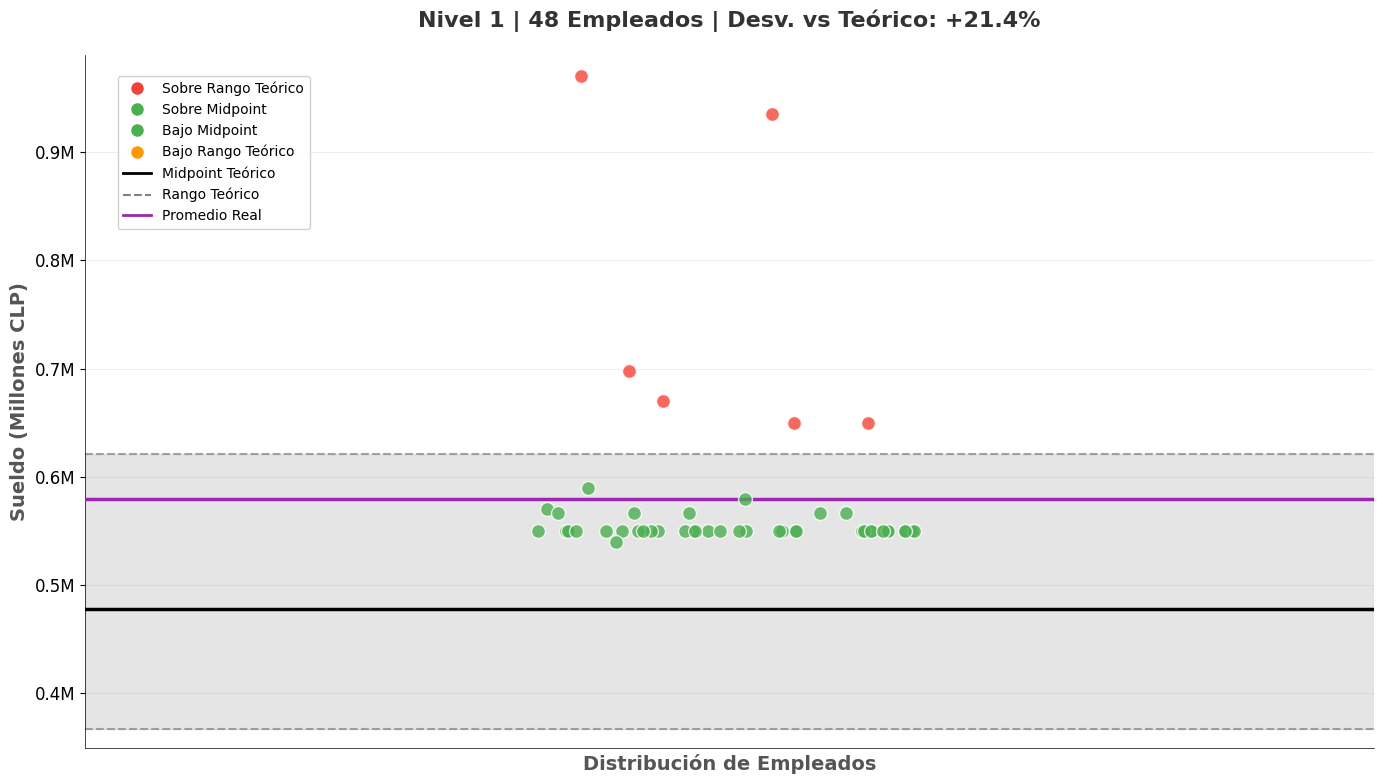


📊 NIVEL 1 - RESUMEN
👥 Total empleados: 48
💰 Promedio real: $579,958
🎯 Midpoint teórico: $477,868
📈 Desviación: +21.4%
✅ Dentro de banda: 42 (87.5%)
⬆️ Arriba de banda: 6 (12.5%)
⬇️ Debajo de banda: 0 (0.0%)

🔺 CASOS ARRIBA DE BANDA:
   • Juan Francisco Torres  | Operario                       | $   970K (+ 56.1%)
   • Mirko Andres Godoy Roj | Operario                       | $   935K (+ 50.5%)
   • Francisco Javier Carre | Coordinador de Planta          | $   698K (+ 12.4%)
   • Hernán Andrés Vargas H | Operario                       | $   670K (+  7.9%)
   • Felipe Ignacio López V | Operario                       | $   650K (+  4.6%)
   • Diego Rafael Rodriguez | Operario                       | $   650K (+  4.6%)


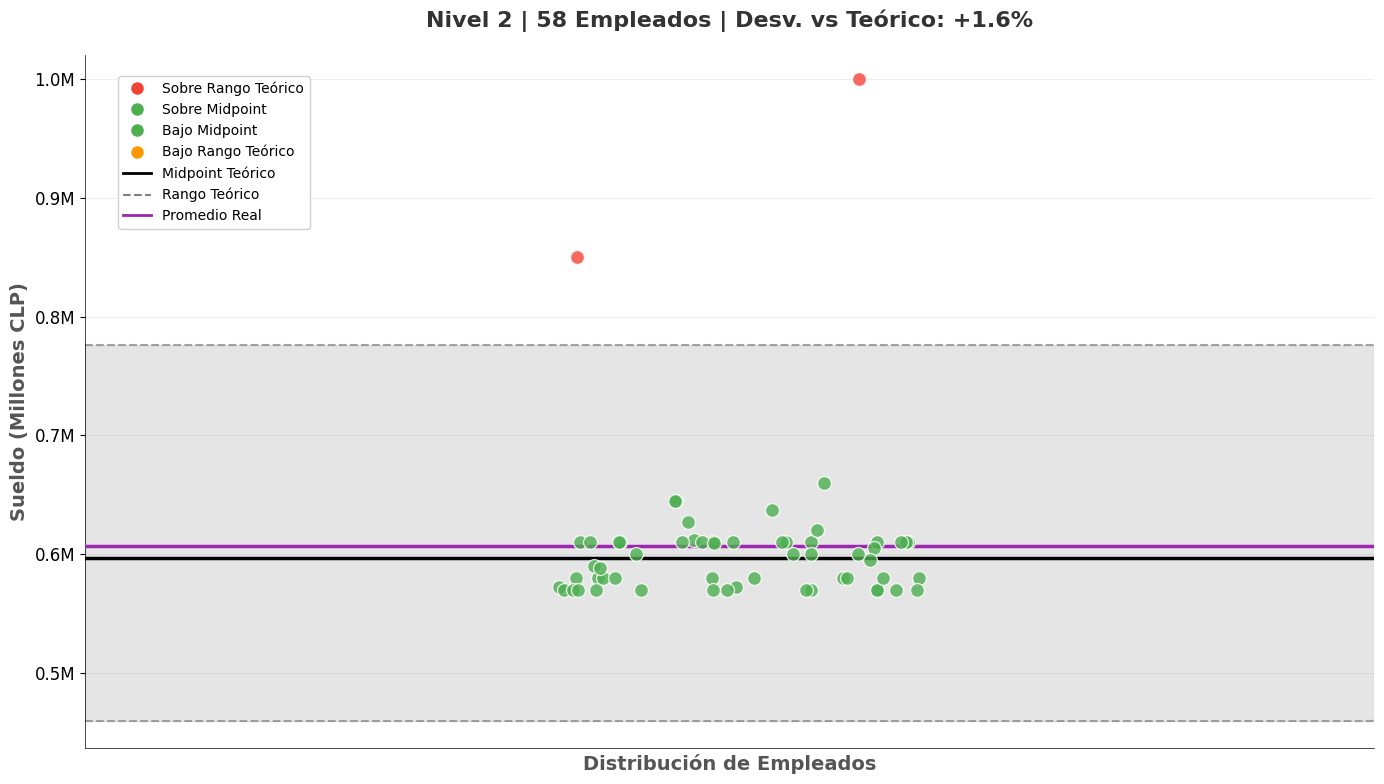


📊 NIVEL 2 - RESUMEN
👥 Total empleados: 58
💰 Promedio real: $606,672
🎯 Midpoint teórico: $597,130
📈 Desviación: +1.6%
✅ Dentro de banda: 56 (96.6%)
⬆️ Arriba de banda: 2 (3.4%)
⬇️ Debajo de banda: 0 (0.0%)

🔺 CASOS ARRIBA DE BANDA:
   • Alfonso Enrique Lara M | Operario                       | $  1000K (+ 28.8%)
   • Felipe Andres Garcia D | Operario                       | $   850K (+  9.5%)


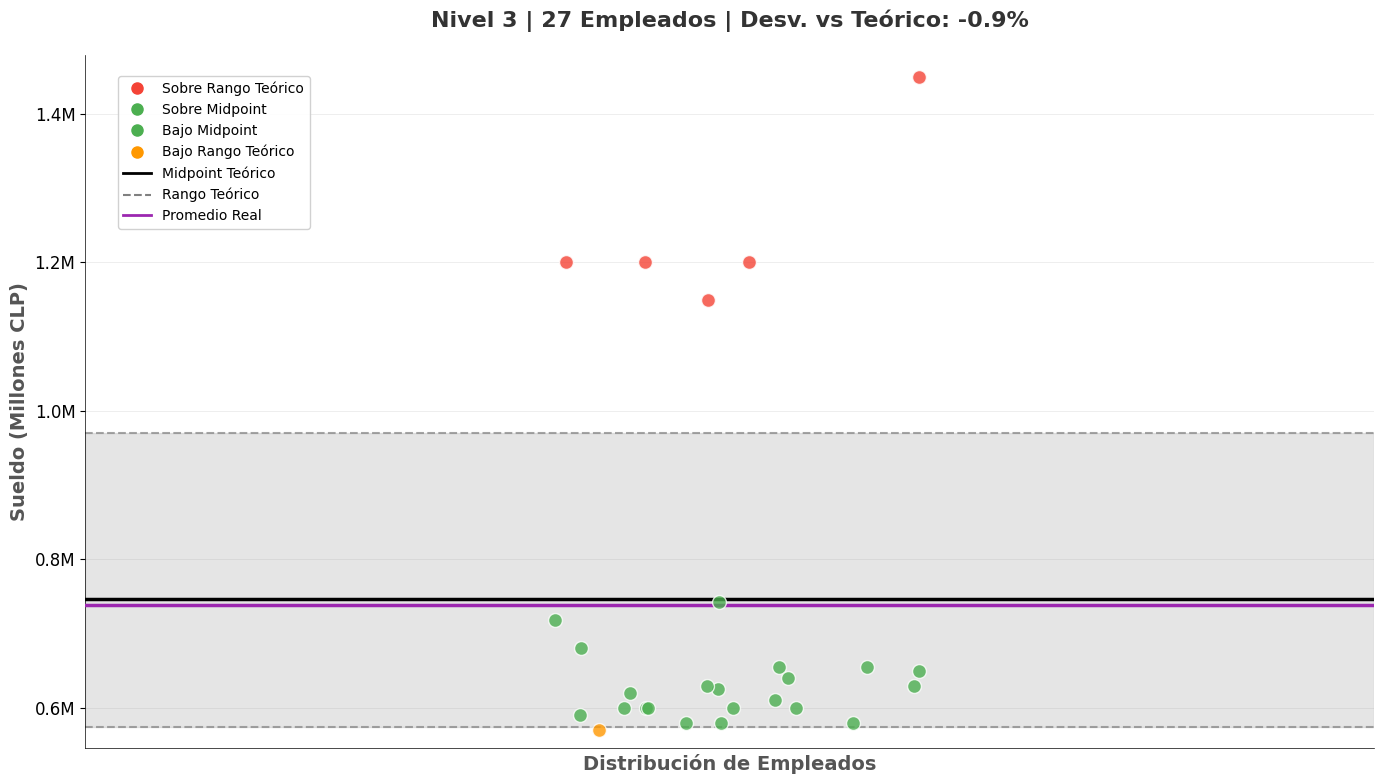


📊 NIVEL 3 - RESUMEN
👥 Total empleados: 27
💰 Promedio real: $739,084
🎯 Midpoint teórico: $746,156
📈 Desviación: -0.9%
✅ Dentro de banda: 21 (77.8%)
⬆️ Arriba de banda: 5 (18.5%)
⬇️ Debajo de banda: 1 (3.7%)

🔺 CASOS ARRIBA DE BANDA:
   • Claudio Antonio Gutier | Operario                       | $  1450K (+ 49.5%)
   • Jose Sebastian Olivas  | Operario                       | $  1200K (+ 23.7%)
   • Luis Jonathan Palma Di | Operario                       | $  1200K (+ 23.7%)
   • Elson Maximiliano Sala | Operario                       | $  1200K (+ 23.7%)
   • Emerson Ivan Romero Re | Operario                       | $  1150K (+ 18.6%)

🔻 CASOS DEBAJO DE BANDA:
   • Rodrigo Bastián Flores | Operario                       | $   570K (-  0.7%)


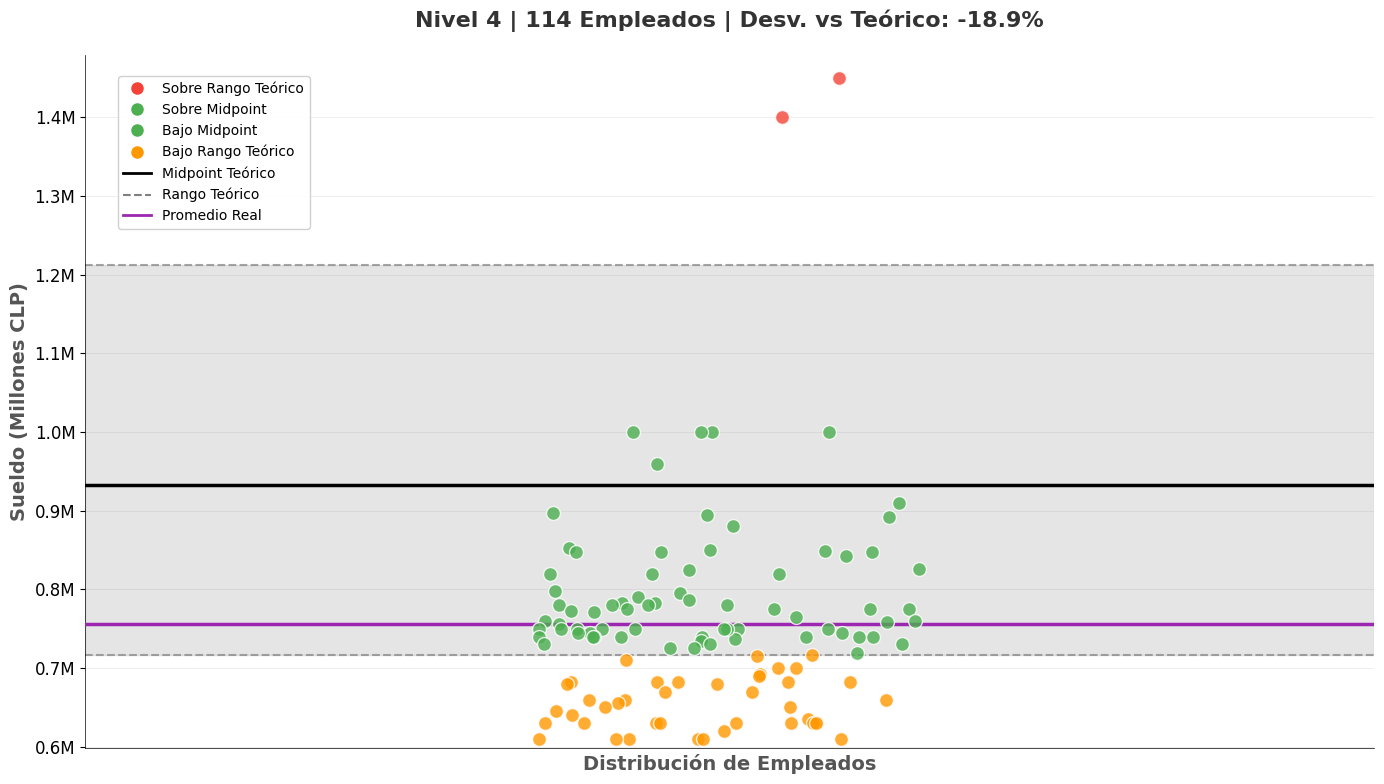


📊 NIVEL 4 - RESUMEN
👥 Total empleados: 114
💰 Promedio real: $756,211
🎯 Midpoint teórico: $932,375
📈 Desviación: -18.9%
✅ Dentro de banda: 71 (62.3%)
⬆️ Arriba de banda: 2 (1.8%)
⬇️ Debajo de banda: 41 (36.0%)

🔺 CASOS ARRIBA DE BANDA:
   • Mario Rodolfo Orellana | Operario                       | $  1450K (+ 19.6%)
   • Joaquin Riquelme Luna  | Operario                       | $  1400K (+ 15.5%)

🔻 CASOS DEBAJO DE BANDA:
   • Felipe Andrés Veas Oya | Analista De Control De Calidad | $   716K (-  0.2%)
   • Jhon Esteban Urbano Sa | Operario                       | $   710K (-  1.0%)
   • David Alejandro Garcia | Operario                       | $   700K (-  2.4%)
   • Victor Felipe Morales  | Asistente De Laboratorio       | $   693K (-  3.4%)
   • Roberto Enrique Romero | Operario                       | $   690K (-  3.8%)
   • Daniel Elias Adonis Ad | Asistente De Laboratorio       | $   682K (-  4.9%)
   • María Jesús Del Carmen | Asistente De Laboratorio       | $   682K (-  4.9%)


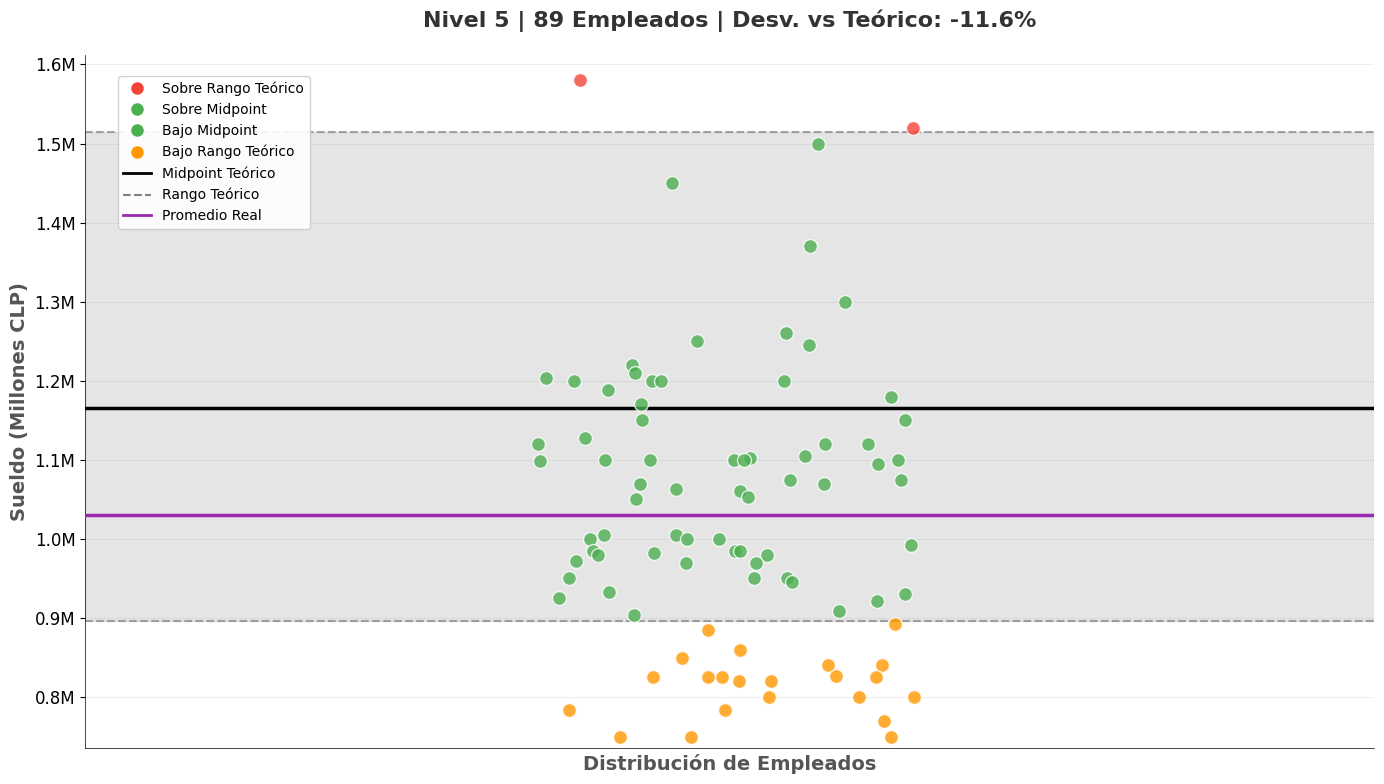


📊 NIVEL 5 - RESUMEN
👥 Total empleados: 89
💰 Promedio real: $1,030,316
🎯 Midpoint teórico: $1,165,069
📈 Desviación: -11.6%
✅ Dentro de banda: 65 (73.0%)
⬆️ Arriba de banda: 2 (2.2%)
⬇️ Debajo de banda: 22 (24.7%)

🔺 CASOS ARRIBA DE BANDA:
   • Angel Reynaldo Cristi  | Operario                       | $  1580K (+  4.3%)
   • Raul Antonio Rojas Gue | Operario                       | $  1520K (+  0.4%)

🔻 CASOS DEBAJO DE BANDA:
   • Jesus Rafael Rodriguez | Inspector De Proceso           | $   892K (-  0.5%)
   • Richard Luis Cordova S | Operario                       | $   885K (-  1.3%)
   • Gerardo Arturo Perez V | Asistente De Planificacion     | $   850K (-  5.2%)
   • Marcelo Nicanor Morale | Operario                       | $   840K (-  6.3%)
   • Maritza Susana Marifil | Inspector De Proceso           | $   840K (-  6.3%)
   • Julio Florencio Puen H | Asistente De Laboratorio       | $   826K (-  7.8%)
   • Manuel Jesus Abarca Mo | Operario                       | $   825K (-  7.9

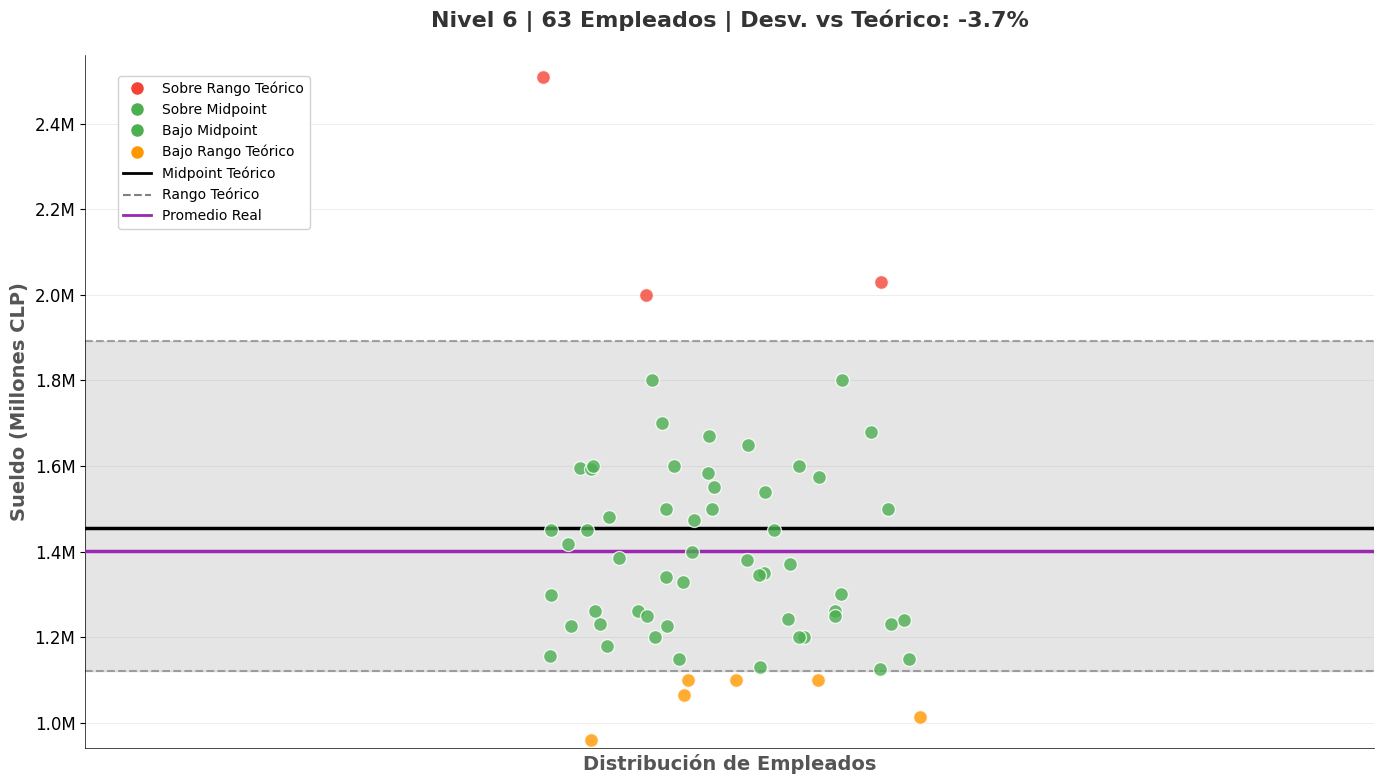


📊 NIVEL 6 - RESUMEN
👥 Total empleados: 63
💰 Promedio real: $1,401,600
🎯 Midpoint teórico: $1,455,835
📈 Desviación: -3.7%
✅ Dentro de banda: 54 (85.7%)
⬆️ Arriba de banda: 3 (4.8%)
⬇️ Debajo de banda: 6 (9.5%)

🔺 CASOS ARRIBA DE BANDA:
   • Leticia Gonzalez Castr | Customer Service               | $  2510K (+ 32.6%)
   • Keny Alexandra Majano  | Analista De Planificación      | $  2030K (+  7.3%)
   • Victor Leonardo Acosta | Customer Service               | $  2000K (+  5.7%)

🔻 CASOS DEBAJO DE BANDA:
   • Paulina Valeska Gonzál | Customer Service               | $  1100K (-  1.8%)
   • Cristian Arturo Polo V | Técnico De Medio Ambiente      | $  1100K (-  1.8%)
   • Jonathan Leonardo Vill | Analista De Planificación      | $  1065K (-  4.9%)
   • Deliana Veronica Villa | Especialista Sabores           | $  1014K (-  9.5%)
   • Alexis Joseph Moya Nav | Analista Cromatográfico        | $  1100K (-  1.8%)
   • Renato Jose Flores Her | Inspector De Proceso           | $   959K (- 14.4%)


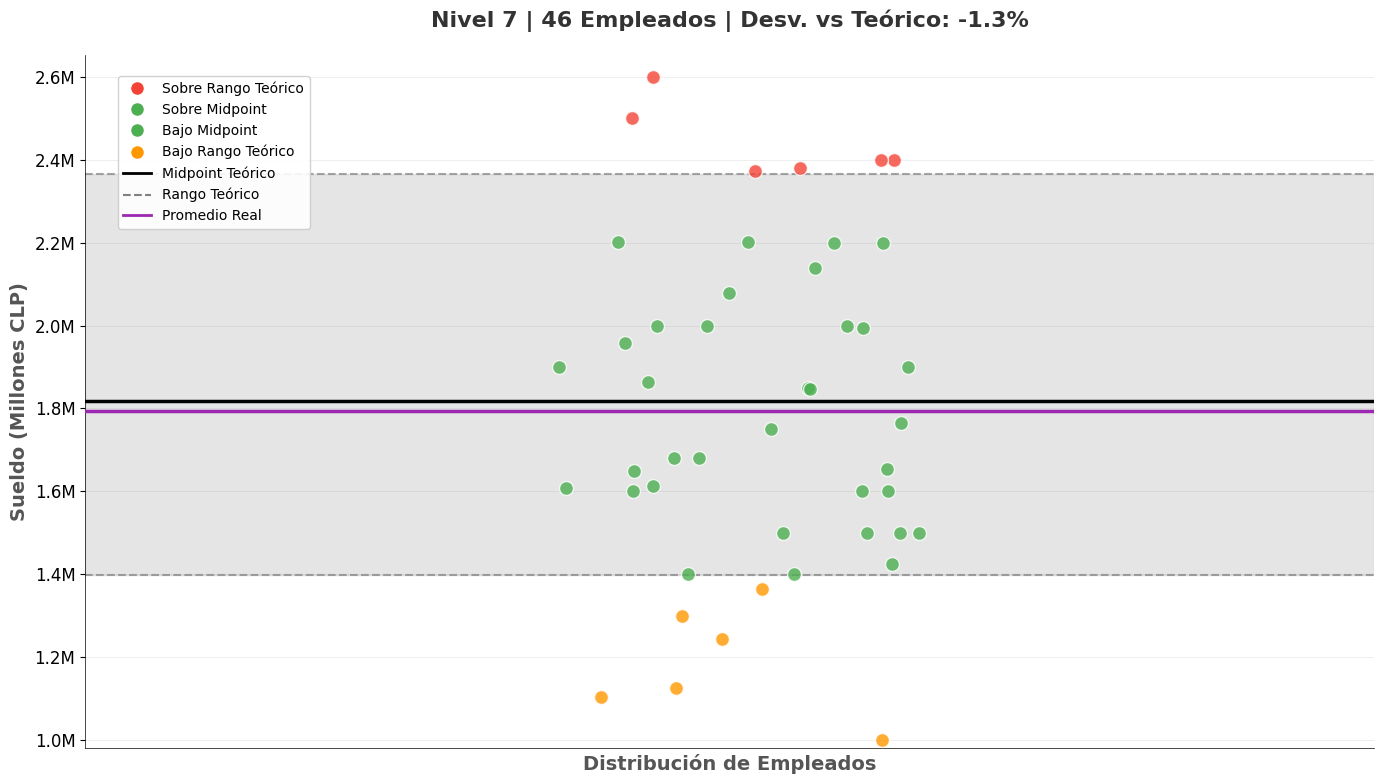


📊 NIVEL 7 - RESUMEN
👥 Total empleados: 46
💰 Promedio real: $1,794,761
🎯 Midpoint teórico: $1,819,169
📈 Desviación: -1.3%
✅ Dentro de banda: 34 (73.9%)
⬆️ Arriba de banda: 6 (13.0%)
⬇️ Debajo de banda: 6 (13.0%)

🔺 CASOS ARRIBA DE BANDA:
   • Diego Alexander Avila  | Analista Control De Gestión Bi | $  2600K (+  9.9%)
   • Vicky Andrea Reveco Fu | Saborista de Planta            | $  2500K (+  5.7%)
   • Ciro Saavedra Navarret | Coordinador Comercial Exportac | $  2400K (+  1.5%)
   • María Francisca Ulloa  | Analista De Innovación         | $  2400K (+  1.5%)
   • Nelida Del Carmen Figu | Key Account Manager            | $  2380K (+  0.6%)
   • Jose Aguilar Gonzalez  | Key Account Manager            | $  2373K (+  0.3%)

🔻 CASOS DEBAJO DE BANDA:
   • Karla Odette Calderon  | Analista Cromatográfico        | $  1365K (-  2.5%)
   • Andrea Paz Cid Araneda | Encargada De Lab.Calidad Polvo | $  1300K (-  7.1%)
   • Ornella Beninati       | Especialista Técnico en Materi | $  1244K (- 11.1%

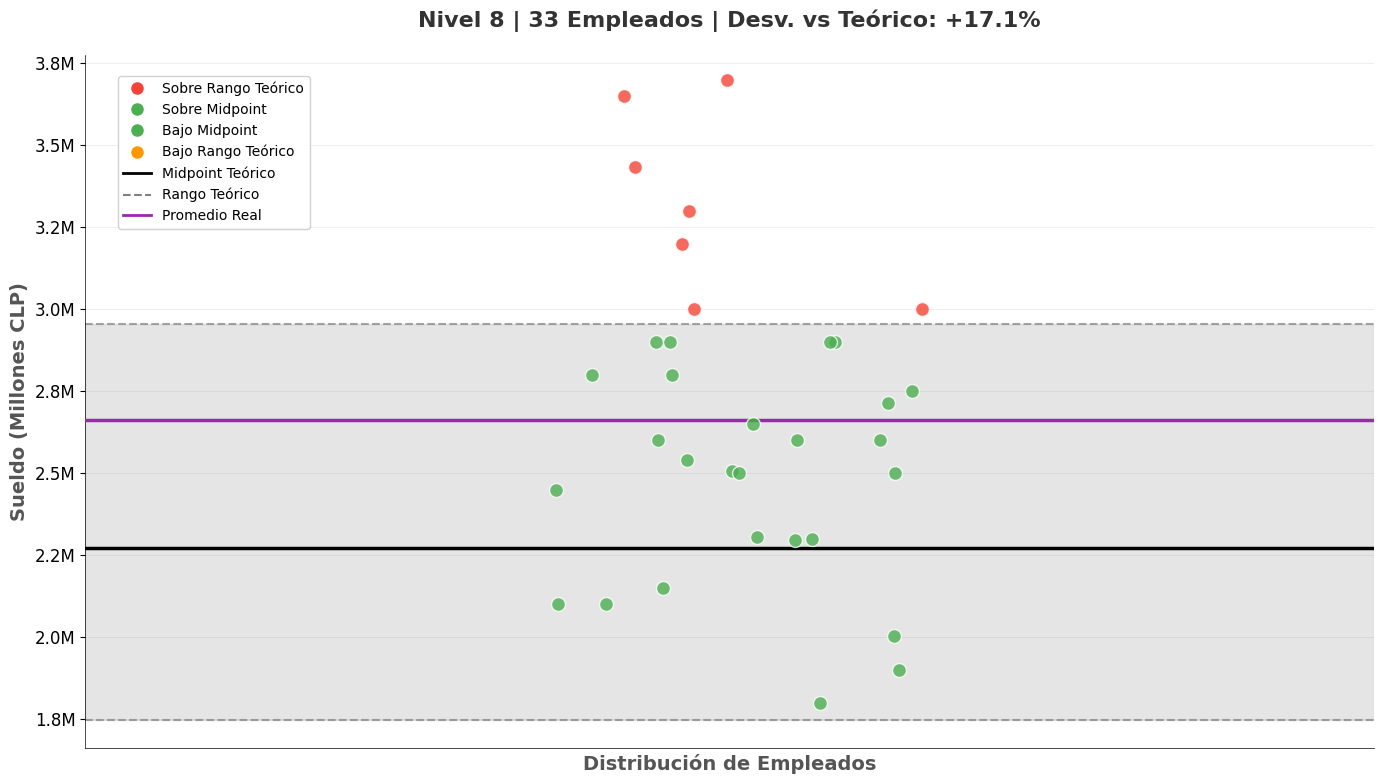


📊 NIVEL 8 - RESUMEN
👥 Total empleados: 33
💰 Promedio real: $2,662,073
🎯 Midpoint teórico: $2,273,180
📈 Desviación: +17.1%
✅ Dentro de banda: 26 (78.8%)
⬆️ Arriba de banda: 7 (21.2%)
⬇️ Debajo de banda: 0 (0.0%)

🔺 CASOS ARRIBA DE BANDA:
   • Loreto Andrea Sepulved | Líder Analistas Cromatográfico | $  3700K (+ 25.2%)
   • Joans Andre Matus Cald | Saborista                      | $  3650K (+ 23.5%)
   • Diana Constanza Cortes | Líder Aplicaciones Sabores     | $  3433K (+ 16.2%)
   • Karen Constanza Pulgar | Fis                            | $  3300K (+ 11.7%)
   • Vanessa Constanza Vald | Jefe Unidad de Regulaciones    | $  3200K (+  8.3%)
   • Andy Olivier Larenas G | Desarrollador Software         | $  3000K (+  1.5%)
   • Claudia Andrea Santand | Fis                            | $  3000K (+  1.5%)


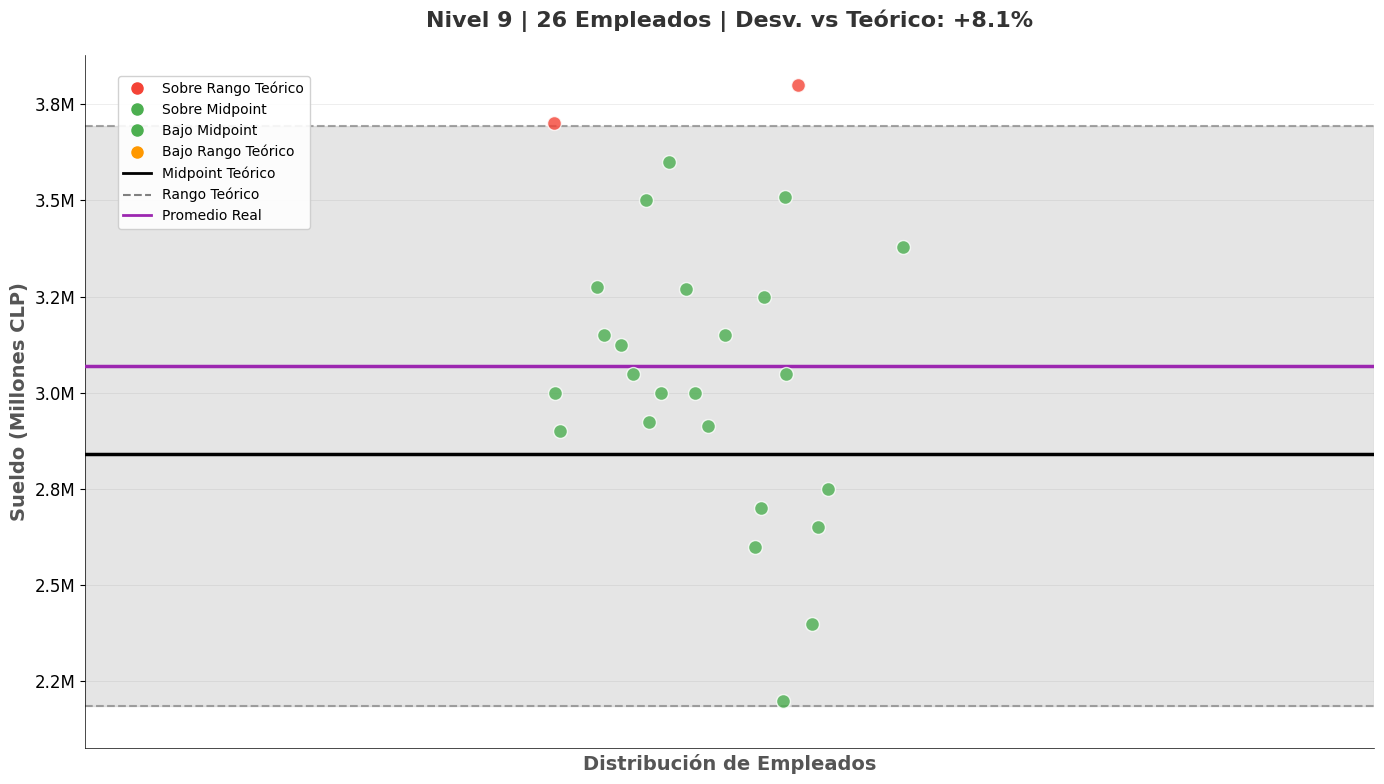


📊 NIVEL 9 - RESUMEN
👥 Total empleados: 26
💰 Promedio real: $3,070,992
🎯 Midpoint teórico: $2,840,499
📈 Desviación: +8.1%
✅ Dentro de banda: 24 (92.3%)
⬆️ Arriba de banda: 2 (7.7%)
⬇️ Debajo de banda: 0 (0.0%)

🔺 CASOS ARRIBA DE BANDA:
   • Jaime Alfonso Rojas Pa | Jefe de BI y Control de Gestió | $  3800K (+  2.9%)
   • Luis Rodrigo Miño Medi | Jefe De Planificación De La Pr | $  3700K (+  0.2%)


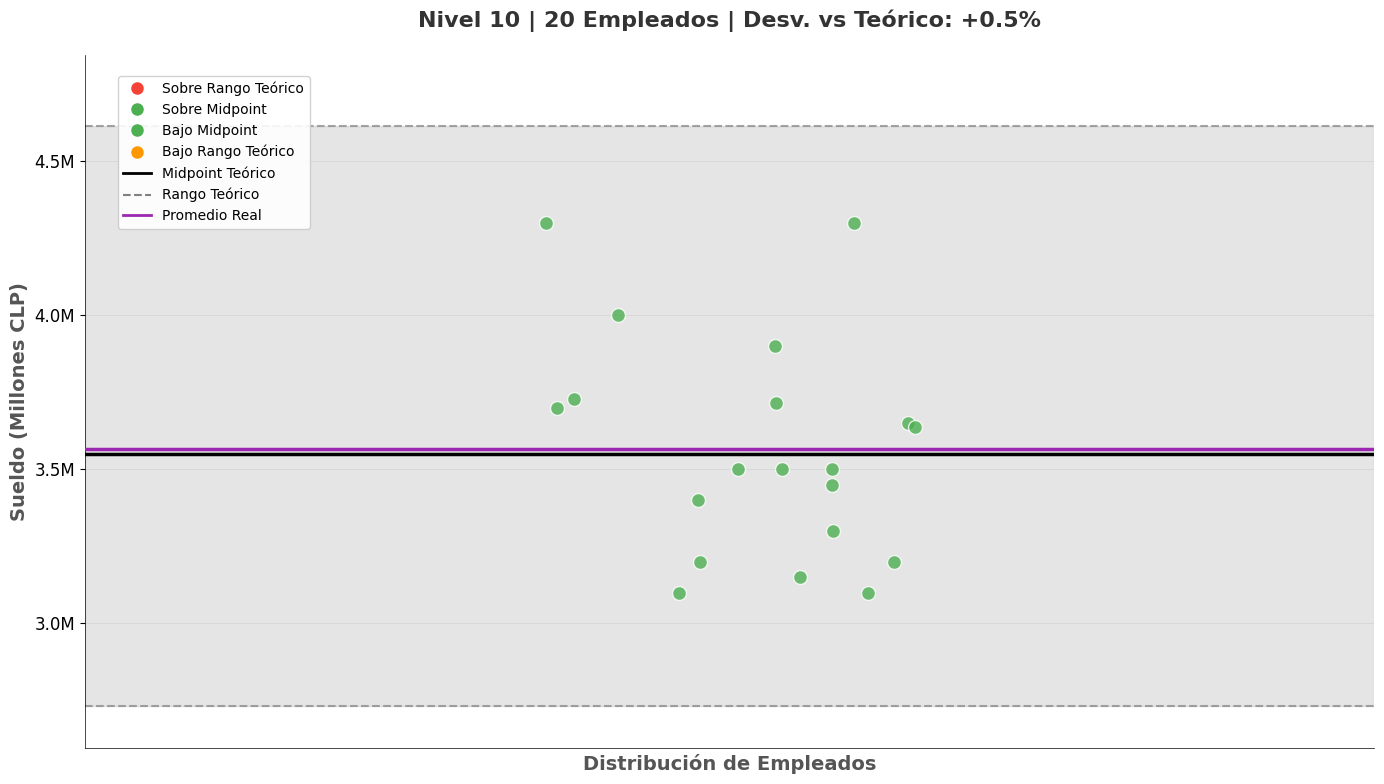


📊 NIVEL 10 - RESUMEN
👥 Total empleados: 20
💰 Promedio real: $3,566,500
🎯 Midpoint teórico: $3,549,405
📈 Desviación: +0.5%
✅ Dentro de banda: 20 (100.0%)
⬆️ Arriba de banda: 0 (0.0%)
⬇️ Debajo de banda: 0 (0.0%)


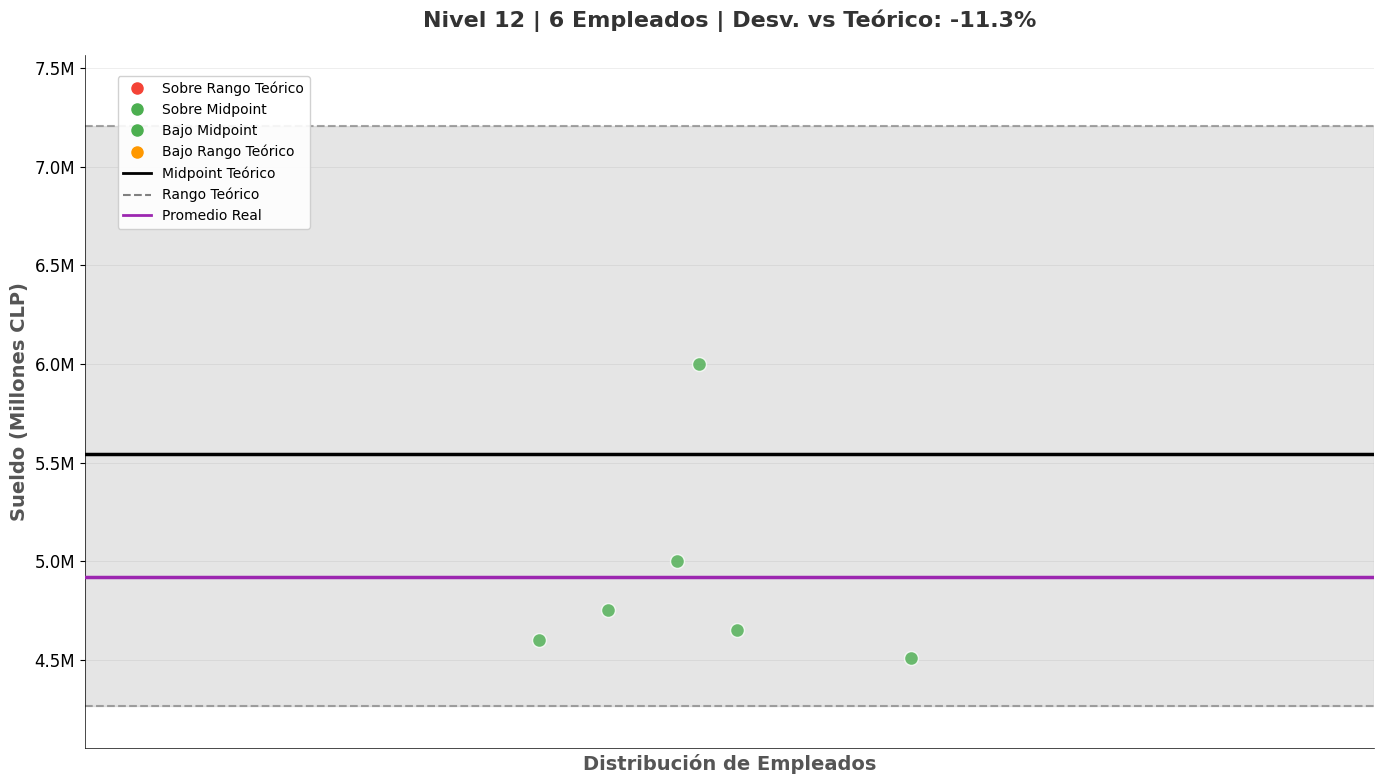


📊 NIVEL 12 - RESUMEN
👥 Total empleados: 6
💰 Promedio real: $4,917,833
🎯 Midpoint teórico: $5,542,135
📈 Desviación: -11.3%
✅ Dentro de banda: 6 (100.0%)
⬆️ Arriba de banda: 0 (0.0%)
⬇️ Debajo de banda: 0 (0.0%)


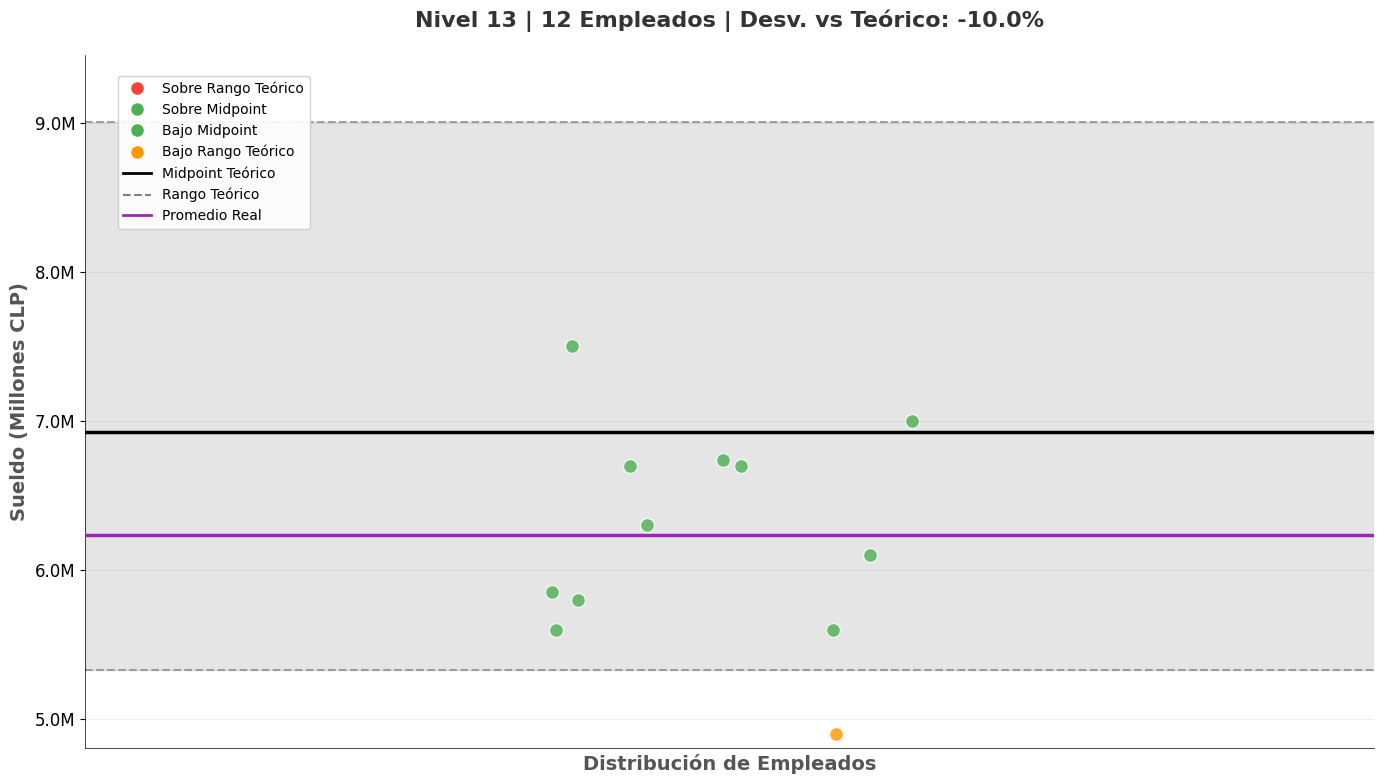


📊 NIVEL 13 - RESUMEN
👥 Total empleados: 12
💰 Promedio real: $6,232,333
🎯 Midpoint teórico: $6,925,290
📈 Desviación: -10.0%
✅ Dentro de banda: 11 (91.7%)
⬆️ Arriba de banda: 0 (0.0%)
⬇️ Debajo de banda: 1 (8.3%)

🔻 CASOS DEBAJO DE BANDA:
   • Patricia Jimena Muñoz  | Perfumista                     | $  4900K (-  8.0%)


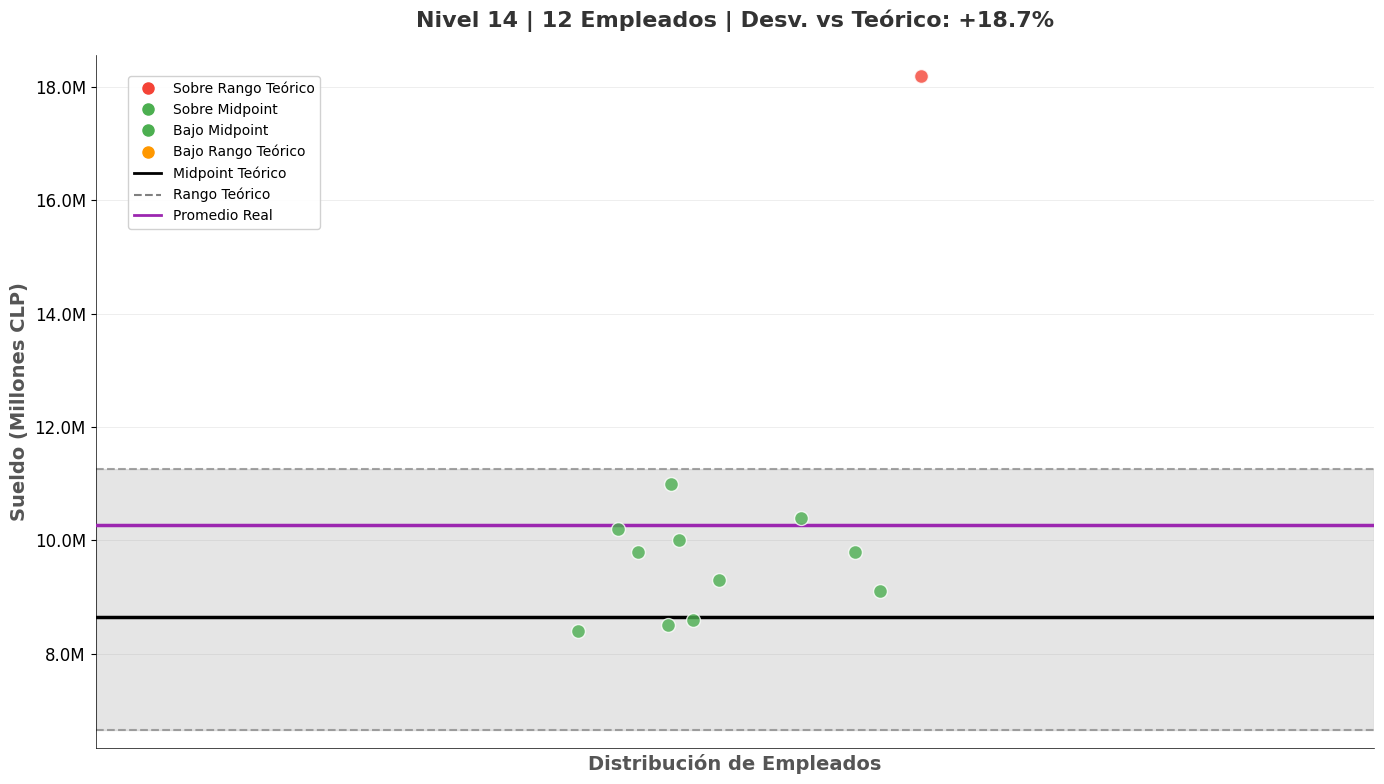


📊 NIVEL 14 - RESUMEN
👥 Total empleados: 12
💰 Promedio real: $10,275,000
🎯 Midpoint teórico: $8,653,639
📈 Desviación: +18.7%
✅ Dentro de banda: 11 (91.7%)
⬆️ Arriba de banda: 1 (8.3%)
⬇️ Debajo de banda: 0 (0.0%)

🔺 CASOS ARRIBA DE BANDA:
   • Miguel Andres Berndt B | Gerente General                | $ 18200K (+ 61.8%)

📋 RESUMEN EJECUTIVO - ANÁLISIS SALARIAL

🎯 INDICADORES CLAVE:
   • Adherencia a banda: 79.6% (441/554)
   • Casos sobre banda: 36 personas (6.5%)
   • Casos bajo banda: 77 personas (13.9%)

🚨 NIVELES CON MÁS DESVIACIONES:
   • Nivel 4: 43/114 personas (37.7%)
   • Nivel 5: 24/89 personas (27.0%)
   • Nivel 7: 12/46 personas (26.1%)
   • Nivel 6: 9/63 personas (14.3%)
   • Nivel 8: 7/33 personas (21.2%)

⚠️ CASOS MÁS CRÍTICOS:
   • Mayor exceso: Miguel Andres Berndt Briceño (Nivel 14) +61.8%
   • Mayor déficit: Estefanía Alejandra Orellana Mora (Nivel 7) -28.5%

💾 Casos críticos exportados a 'casos_fuera_banda_limpio.csv'

✅ Análisis completado - 13 niveles analizados


In [19]:
# Configuración de estilo limpio
plt.style.use('default')
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

# Función para clasificar posición en banda
def clasificar_posicion(sueldo, nivel, df_teorico):
    """Clasifica si el sueldo está dentro, arriba o abajo de la banda teórica"""
    if nivel < len(df_teorico):
        minimo = df_teorico.iloc[nivel]['Minimo']
        maximo = df_teorico.iloc[nivel]['Maximo']
        
        if sueldo < minimo:
            return 'Debajo de Banda'
        elif sueldo > maximo:
            return 'Arriba de Banda'
        else:
            return 'Dentro de Banda'
    return 'Sin Datos'

# Aplicar clasificación
df['Posicion_Banda'] = df.apply(lambda row: clasificar_posicion(
    row['Sueldo Actualizado'], row['Nivel Actualizado'], df_teorico), axis=1)

# Obtener niveles con datos
niveles_con_datos = sorted(df['Nivel Actualizado'].unique())

# Colores simplificados (siguiendo el estilo del ejemplo)
colores = {
    'Dentro de Banda': '#4CAF50',      # Verde
    'Arriba de Banda': '#F44336',      # Rojo  
    'Debajo de Banda': '#FF9800'       # Naranja
}

# =============================================================================
# GRÁFICOS LIMPIOS NIVEL POR NIVEL
# =============================================================================

# Crear análisis detallado por nivel
personas_fuera_banda = []

for nivel in niveles_con_datos:
    # Crear figura individual limpia para cada nivel
    fig, ax = plt.subplots(1, 1, figsize=(14, 8))
    
    # Datos del nivel actual
    datos_nivel = df[df['Nivel Actualizado'] == nivel].copy()
    
    if nivel < len(df_teorico):
        # Obtener valores teóricos
        minimo_teorico = df_teorico.iloc[nivel]['Minimo']
        midpoint_teorico = df_teorico.iloc[nivel]['Midpoint']
        maximo_teorico = df_teorico.iloc[nivel]['Maximo']
        
        # Calcular promedio real
        promedio_real = datos_nivel['Sueldo Actualizado'].mean()
        mediana_real = datos_nivel['Sueldo Actualizado'].median()
        desviacion = (promedio_real - midpoint_teorico) / midpoint_teorico * 100
        
        # BANDA TEÓRICA (área sombreada)
        ax.axhspan(minimo_teorico, maximo_teorico, alpha=0.2, color='gray', 
                  label='Rango Teórico', zorder=1)
        
        # LÍNEAS DE REFERENCIA PRINCIPALES
        # Midpoint teórico (línea sólida negra)
        ax.axhline(y=midpoint_teorico, color='black', linestyle='-', linewidth=2.5, 
                  label='Midpoint Teórico', zorder=3)
        
        # Rango teórico (líneas punteadas grises)
        ax.axhline(y=minimo_teorico, color='gray', linestyle='--', linewidth=1.5, 
                  alpha=0.7, zorder=2)
        ax.axhline(y=maximo_teorico, color='gray', linestyle='--', linewidth=1.5, 
                  alpha=0.7, zorder=2)
        
        # Promedio real (línea sólida púrpura)
        ax.axhline(y=promedio_real, color='#9C27B0', linestyle='-', linewidth=2.5, 
                  label='Promedio Real', zorder=4)
        
        # SCATTER DE EMPLEADOS (simplificado)
        np.random.seed(42 + nivel)
        jitter = np.random.uniform(-0.15, 0.15, len(datos_nivel))
        x_positions = np.full(len(datos_nivel), 0) + jitter  # Centrado en 0
        
        # Separar por posición en banda
        for posicion, color in colores.items():
            mask = datos_nivel['Posicion_Banda'] == posicion
            if mask.any():
                ax.scatter(x_positions[mask], datos_nivel[mask]['Sueldo Actualizado'],
                          c=color, alpha=0.8, s=100, edgecolors='white', linewidth=1,
                          zorder=5)
        
        # Análisis para reporte
        arriba_banda = datos_nivel[datos_nivel['Sueldo Actualizado'] > maximo_teorico]
        debajo_banda = datos_nivel[datos_nivel['Sueldo Actualizado'] < minimo_teorico]
        dentro_banda = datos_nivel[datos_nivel['Posicion_Banda'] == 'Dentro de Banda']
        
        # Guardar datos para análisis posterior
        for _, persona in arriba_banda.iterrows():
            diferencia = persona['Sueldo Actualizado'] - maximo_teorico
            porcentaje_exceso = (diferencia / maximo_teorico) * 100
            personas_fuera_banda.append({
                'Nombre': persona['Nombre'],
                'Cargo': persona['Cargo'],
                'Nivel': nivel,
                'Sueldo_Actual': persona['Sueldo Actualizado'],
                'Referencia_Teorica': maximo_teorico,
                'Diferencia': diferencia,
                'Porcentaje_Diferencia': porcentaje_exceso,
                'Posicion': 'Arriba de Banda',
                'Anos_Servicio': persona['Años de Servicio']
            })
        
        for _, persona in debajo_banda.iterrows():
            diferencia = minimo_teorico - persona['Sueldo Actualizado']
            porcentaje_deficit = (diferencia / minimo_teorico) * 100
            personas_fuera_banda.append({
                'Nombre': persona['Nombre'],
                'Cargo': persona['Cargo'],
                'Nivel': nivel,
                'Sueldo_Actual': persona['Sueldo Actualizado'],
                'Referencia_Teorica': minimo_teorico,
                'Diferencia': diferencia,
                'Porcentaje_Diferencia': porcentaje_deficit,
                'Posicion': 'Debajo de Banda',
                'Anos_Servicio': persona['Años de Servicio']
            })
        
        # TÍTULO LIMPIO Y SIMPLE
        titulo = f'Nivel {nivel} | {len(datos_nivel)} Empleados | Desv. vs Teórico: {desviacion:+.1f}%'
        ax.set_title(titulo, fontsize=16, fontweight='bold', pad=20, color='#333333')
        
        # CONFIGURACIÓN DE EJES LIMPIA
        ax.set_xlim(-0.5, 0.5)
        
        # Calcular límites Y con margen
        y_min = min(minimo_teorico*0.95, datos_nivel['Sueldo Actualizado'].min()*0.98)
        y_max = max(maximo_teorico*1.05, datos_nivel['Sueldo Actualizado'].max()*1.02)
        ax.set_ylim(y_min, y_max)
        
        # ETIQUETAS SIMPLES
        ax.set_xlabel('Distribución de Empleados', fontsize=14, fontweight='bold', color='#555555')
        ax.set_ylabel('Sueldo (Millones CLP)', fontsize=14, fontweight='bold', color='#555555')
        
        # FORMATO DEL EJE Y
        ax.yaxis.set_major_formatter(plt.FuncFormatter(
            lambda x, p: f'{x/1e6:.1f}M'))
        
        # REMOVER TICKS DEL EJE X (como en el ejemplo)
        ax.set_xticks([])
        
        # GRID SUTIL
        ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5, axis='y')
        ax.set_axisbelow(True)
        
        # LEYENDA LIMPIA Y COMPACTA (estilo del ejemplo)
        legend_elements = [
            plt.Line2D([0], [0], color='#F44336', marker='o', linestyle='None',
                      markersize=8, label='Sobre Rango Teórico'),
            plt.Line2D([0], [0], color='#4CAF50', marker='o', linestyle='None',
                      markersize=8, label='Sobre Midpoint'),
            plt.Line2D([0], [0], color='#4CAF50', marker='o', linestyle='None',
                      markersize=8, label='Bajo Midpoint'),
            plt.Line2D([0], [0], color='#FF9800', marker='o', linestyle='None',
                      markersize=8, label='Bajo Rango Teórico'),
            plt.Line2D([0], [0], color='black', linestyle='-', linewidth=2,
                      label='Midpoint Teórico'),
            plt.Line2D([0], [0], color='gray', linestyle='--', linewidth=1.5,
                      label='Rango Teórico'),
            plt.Line2D([0], [0], color='#9C27B0', linestyle='-', linewidth=2,
                      label='Promedio Real')
        ]
        
        ax.legend(handles=legend_elements, loc='upper left', fontsize=10, 
                 framealpha=0.9, bbox_to_anchor=(0.02, 0.98))
        
        # REMOVER BORDES INNECESARIOS
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(0.5)
        ax.spines['bottom'].set_linewidth(0.5)
        
        plt.tight_layout()
        plt.show()
        
        # REPORTE SIMPLE POR NIVEL
        print(f"\n{'='*60}")
        print(f"📊 NIVEL {nivel} - RESUMEN")
        print('='*60)
        print(f"👥 Total empleados: {len(datos_nivel)}")
        print(f"💰 Promedio real: ${promedio_real:,.0f}")
        print(f"🎯 Midpoint teórico: ${midpoint_teorico:,.0f}")
        print(f"📈 Desviación: {desviacion:+.1f}%")
        print(f"✅ Dentro de banda: {len(dentro_banda)} ({len(dentro_banda)/len(datos_nivel)*100:.1f}%)")
        print(f"⬆️ Arriba de banda: {len(arriba_banda)} ({len(arriba_banda)/len(datos_nivel)*100:.1f}%)")
        print(f"⬇️ Debajo de banda: {len(debajo_banda)} ({len(debajo_banda)/len(datos_nivel)*100:.1f}%)")
        
        # Mostrar casos críticos si existen
        if len(arriba_banda) > 0:
            print(f"\n🔺 CASOS ARRIBA DE BANDA:")
            for _, persona in arriba_banda.iterrows():
                exceso = persona['Sueldo Actualizado'] - maximo_teorico
                pct_exceso = (exceso/maximo_teorico)*100
                print(f"   • {persona['Nombre'][:22]:<22} | {persona['Cargo'][:30]:<30} | ${persona['Sueldo Actualizado']/1000:>6.0f}K (+{pct_exceso:>5.1f}%)")
        
        if len(debajo_banda) > 0:
            print(f"\n🔻 CASOS DEBAJO DE BANDA:")
            for _, persona in debajo_banda.iterrows():
                deficit = minimo_teorico - persona['Sueldo Actualizado']
                pct_deficit = (deficit/minimo_teorico)*100
                print(f"   • {persona['Nombre'][:22]:<22} | {persona['Cargo'][:30]:<30} | ${persona['Sueldo Actualizado']/1000:>6.0f}K (-{pct_deficit:>5.1f}%)")

# =============================================================================
# RESUMEN EJECUTIVO FINAL
# =============================================================================

df_fuera_banda = pd.DataFrame(personas_fuera_banda)

print(f"\n" + "="*80)
print("📋 RESUMEN EJECUTIVO - ANÁLISIS SALARIAL")
print("="*80)

# Estadísticas globales
total_personas = len(df)
dentro_banda_total = len(df[df['Posicion_Banda'] == 'Dentro de Banda'])
arriba_banda_total = len(df[df['Posicion_Banda'] == 'Arriba de Banda'])
debajo_banda_total = len(df[df['Posicion_Banda'] == 'Debajo de Banda'])

print(f"\n🎯 INDICADORES CLAVE:")
print(f"   • Adherencia a banda: {dentro_banda_total/total_personas*100:.1f}% ({dentro_banda_total}/{total_personas})")
print(f"   • Casos sobre banda: {arriba_banda_total} personas ({arriba_banda_total/total_personas*100:.1f}%)")
print(f"   • Casos bajo banda: {debajo_banda_total} personas ({debajo_banda_total/total_personas*100:.1f}%)")

# Niveles más problemáticos
if len(df_fuera_banda) > 0:
    problemas_por_nivel = df_fuera_banda.groupby('Nivel').size().sort_values(ascending=False)
    print(f"\n🚨 NIVELES CON MÁS DESVIACIONES:")
    for nivel, cantidad in problemas_por_nivel.head(5).items():
        total_nivel = len(df[df['Nivel Actualizado'] == nivel])
        pct_problema = (cantidad/total_nivel)*100
        print(f"   • Nivel {nivel}: {cantidad}/{total_nivel} personas ({pct_problema:.1f}%)")

# Casos más críticos
if len(df_fuera_banda) > 0:
    print(f"\n⚠️ CASOS MÁS CRÍTICOS:")
    
    # Mayor exceso
    arriba_sorted = df_fuera_banda[df_fuera_banda['Posicion'] == 'Arriba de Banda']
    if len(arriba_sorted) > 0:
        max_exceso = arriba_sorted.loc[arriba_sorted['Porcentaje_Diferencia'].idxmax()]
        print(f"   • Mayor exceso: {max_exceso['Nombre']} (Nivel {max_exceso['Nivel']}) +{max_exceso['Porcentaje_Diferencia']:.1f}%")
    
    # Mayor déficit
    debajo_sorted = df_fuera_banda[df_fuera_banda['Posicion'] == 'Debajo de Banda']
    if len(debajo_sorted) > 0:
        max_deficit = debajo_sorted.loc[debajo_sorted['Porcentaje_Diferencia'].idxmax()]
        print(f"   • Mayor déficit: {max_deficit['Nombre']} (Nivel {max_deficit['Nivel']}) -{max_deficit['Porcentaje_Diferencia']:.1f}%")

# Exportar resultados
if len(df_fuera_banda) > 0:
    df_fuera_banda.to_csv('casos_fuera_banda_limpio.csv', index=False)
    print(f"\n💾 Casos críticos exportados a 'casos_fuera_banda_limpio.csv'")

print(f"\n✅ Análisis completado - {len(niveles_con_datos)} niveles analizados")
print("="*80)